<Figure size 432x288 with 0 Axes>

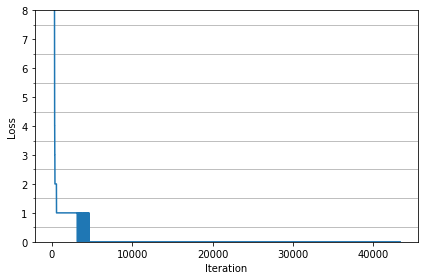

In [5]:
import matplotlib
# %matplotlib notebook
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import cv2,json,os,glob,tqdm
file_name='plot/chart2'
!rm {file_name}
!touch {file_name}
!gen_plot_loss.sh 'logs/smoke_20200715.out' {file_name}
!gen_plot_loss.sh 'logs/smoke_20200721.out' {file_name}
!gen_plot_loss.sh 'logs/smoke_20200723.out' {file_name}
iterations, losses=[],[]
with open(file_name,'r') as fid:
    for line in fid.readlines():
        line=line.strip()
        try:
            losses.append(int(float(line.split(',')[2])))
            iterations.append(int(line.split(',')[0]))
        except:
            continue
plt.clf()
fig, ax = plt.subplots()
# set area we focus on
ax.set_ylim(0, 8)

major_locator = MultipleLocator()
minor_locator = MultipleLocator(0.5)
ax.yaxis.set_major_locator(major_locator)
ax.yaxis.set_minor_locator(minor_locator)
ax.yaxis.grid(True, which='minor')
ax.plot(iterations, losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.tight_layout()


In [1]:
import os
os.chdir('/opt/work/smoke')

In [2]:
from uselib import det_single_img
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
# from detectron2.utils.visualizer import Visualizer
# from detectron2.structures import Instances
from fvcore.common.timer import Timer
import random
def draw_boxes(detections, image, colors):
    import cv2
    for label, confidence, bbox in detections:
#         print('===============',label,type(label))
        left, top, right, bottom = bbox2points(bbox)
        cv2.rectangle(image, (left, top), (right, bottom), colors[label], 1)
        cv2.putText(image, "{} [{:.2f}]".format(label, float(confidence)),
                    (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    colors[label], 2)
    return image

def class_colors(names):
    """
    Create a dict with one random BGR color for each
    class name
    """
    return {name: (
        random.randint(0, 255),
        random.randint(0, 255),
        random.randint(0, 255)) for name in names}
def bbox2points(bbox):
    """
    From bounding box yolo format
    to corner points cv2 rectangle
    """
    x, y, w, h = bbox
    xmin = int(round(x - (w / 2)))
    xmax = int(round(x + (w / 2)))
    ymin = int(round(y - (h / 2)))
    ymax = int(round(y + (h / 2)))
    return xmin, ymin, xmax, ymax
thing_classes = ['smoking']
allimagesfiles=[]
tt=Timer()
tt.pause()
with open('cfg/train.txt','r') as fid:
    allimagesfiles.extend([x for x in list(map(str.strip,fid.readlines())) ])
#     allimagesfiles.extend([x for x in list(map(str.strip,fid.readlines())) if 'car' in x])
xx=iter([allimagesfiles[x] for x  in np.random.choice(len(allimagesfiles),len(allimagesfiles),replace=False)])  


In [3]:
yoyo = det_single_img(configPath="cfg/smoke.cfg", weightPath="backup/smoke_35000.weights",
                 metaPath="cfg/smoke.data",gpu_id=1)

In [4]:
valfiles=iter(list(glob.glob('/opt/work/smoke/testdata/*')))

In [5]:
frame_read_file_name=next(valfiles)
# frame_read_file_name='picturefrombaidubing/4945a1b1bffa46d79cd9cb54a49bf3cd.png'
#4945a1b1bffa46d79cd9cb54a49bf3cd.png
img=cv2.imread(frame_read_file_name)
tt.reset()
predicts, ddimg = yoyo.detect(img)
tt.pause()
# vlz = Visualizer(ddimg, {"thing_classes": thing_classes}, instance_mode=1)
        # "pred_boxes":,"scores","pred_classes"
# instance = Instances(yoyo.getsize(),
#                      **{"pred_boxes": np.array(list(map(convertBack, [x[2] for x in predicts]))),
#                         "scores": np.array([x[1] for x in predicts]),
#                         "pred_classes": np.array([thing_classes.index(x[0]) for x in predicts])})
# vout = vlz.draw_instance_predictions(predictions=instance)
# kitchen_img_resized = vout.get_image()
# plt.figure(figsize=(10,10))
# plt.imshow(kitchen_img_resized)
for i in predicts:print(i)
print(f'******** one shot detect time is {tt.seconds():.2f} and {int(float(1/tt.seconds()))} fps.file is {frame_read_file_name} ********')

8
('smoking', 0.61464923620224, (164.81179809570312, 110.45992279052734, 29.725553512573242, 45.36708450317383))
******** one shot detect time is 0.08 and 11 fps.file is /opt/work/smoke/testdata/0585d4473f62407e84a6528cb6df33d7.jpeg ********


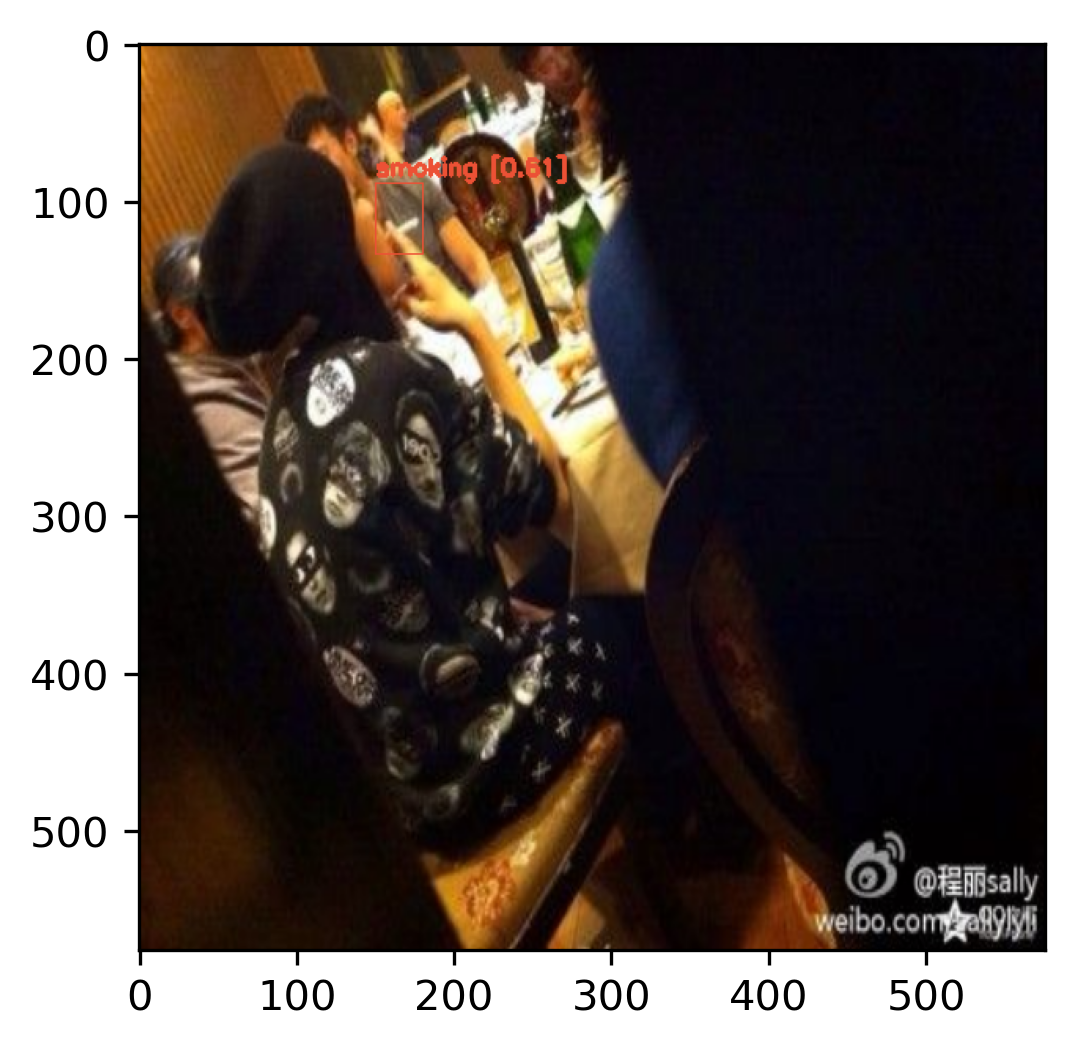

In [7]:
image = draw_boxes(predicts, ddimg, class_colors(['smoking']))
plt.figure(dpi=300)
plt.imshow(image)